In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(10)

df = pd.DataFrame({
    "employee_id": range(1, 501),
    "experience_years": np.random.randint(0, 20, 500),
    "salary": np.random.randint(20000, 150000, 500),
    "performance_rating": np.random.randint(1, 6, 500),
    "department": np.random.choice(["IT", "HR", "Sales", "Finance"], 500)
})

In [3]:
# Inspection
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   employee_id         500 non-null    int64 
 1   experience_years    500 non-null    int32 
 2   salary              500 non-null    int32 
 3   performance_rating  500 non-null    int32 
 4   department          500 non-null    object
dtypes: int32(3), int64(1), object(1)
memory usage: 13.8+ KB


,employee_id,experience_years,salary,performance_rating,department
count,500.000000,500.000000,500.000000,500.000000,500
unique,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,HR
freq,NaN,NaN,NaN,NaN,128
mean,250.500000,9.768000,85734.504000,2.974000,NaN
std,144.481833,5.896415,37764.998663,1.421748,NaN
min,1.000000,0.000000,20135.000000,1.000000,NaN
25%,125.750000,5.000000,53242.000000,2.000000,NaN
50%,250.500000,10.000000,86474.000000,3.000000,NaN
75%,375.250000,15.000000,118165.250000,4.000000,NaN


In [4]:
# GroupBy with multiple columns
df.groupby("department")["salary"].agg(["mean", "median", "max"])

,mean,median,max
department,,,
Finance,81765.471074,78103.0,149792
HR,89800.867188,94153.5,149927
IT,85814.166667,79562.5,149722
Sales,85332.272000,87230.0,149897


In [6]:
# Pivot table
pd.pivot_table(
    df,
    values="salary",
    index="department",
    columns="performance_rating",
    aggfunc="mean"
)

performance_rating,1,2,3,4,5
department,,,,,
Finance,82720.923077,76804.807692,83619.500000,82036.041667,84187.920000
HR,97866.692308,90268.281250,85418.960000,79886.210526,92618.461538
IT,90444.909091,79540.033333,91832.444444,79517.652174,88675.583333
Sales,85739.111111,102458.947368,89882.800000,75612.714286,78485.846154


In [7]:
# Ranking
df["salary_rank"] = df["salary"].rank(ascending=False)


In [8]:
# Conditional column
df["level"] = np.where(df["experience_years"] >= 10, "Senior", "Junior")

In [9]:
# Value counts
df["department"].value_counts(normalize=True)


department
HR         0.256
IT         0.252
Sales      0.250
Finance    0.242
Name: proportion, dtype: float64

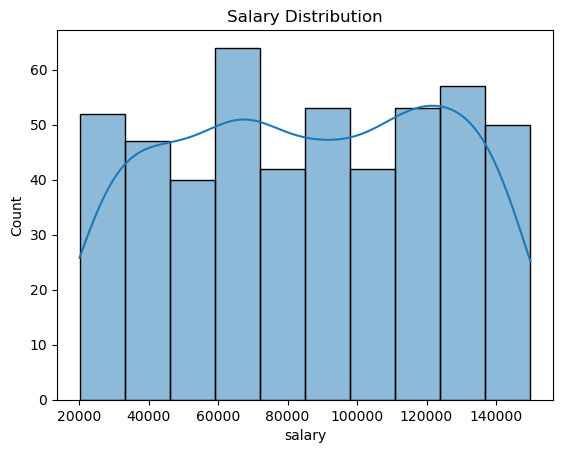

In [12]:
#Visualization

import seaborn as sns
import matplotlib.pyplot as plt

# Salary distribution
sns.histplot(df["salary"], kde=True)
plt.title("Salary Distribution")
plt.show()


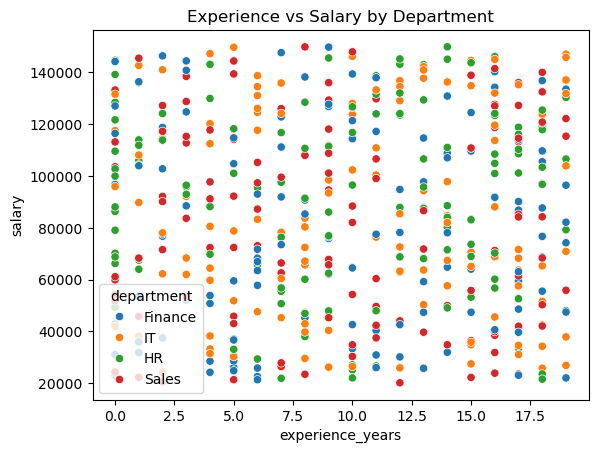

In [13]:
# Experience vs Salary
sns.scatterplot(x="experience_years", y="salary", hue="department", data=df)
plt.title("Experience vs Salary by Department")
plt.show()

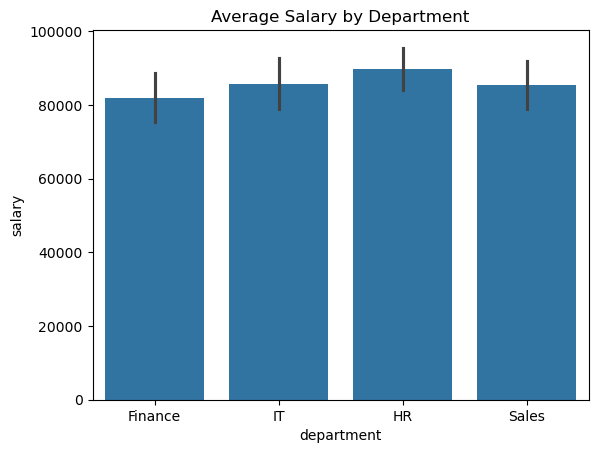

In [14]:
# Bar plot
sns.barplot(x="department", y="salary", data=df)
plt.title("Average Salary by Department")
plt.show()

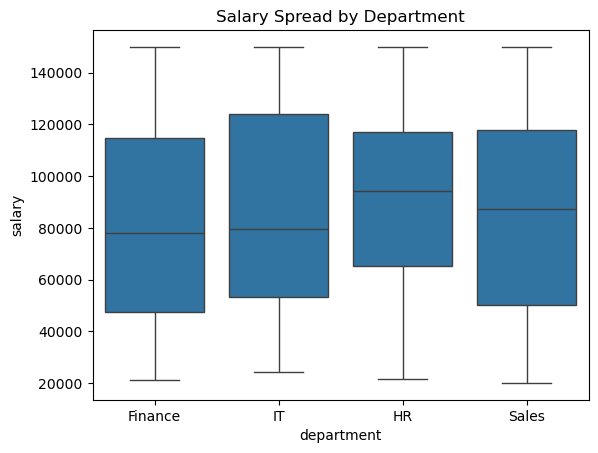

In [15]:
# Boxplot
sns.boxplot(x="department", y="salary", data=df)
plt.title("Salary Spread by Department")
plt.show()